### Задача 14 

Используя данные о школьниках, выявить степень их алкогольной зависимости. В данных, взятых с UCI 'Students' (исходная выборка изъята из UCI, но осталась в других источниках), содержится информация о 30 признаках для каждого школьника, включая социальные и гендерные, а также указана материальная обеспеченность и количество свободного времени. Выбрать на свой взгляд наиболее весомые признаки и предсказать степень употребления алкоголя по выходным или будним по шкале от 0 до 5.  

Данные: https://github.com/amanchoudhary/student-alcohol-consumption-prediction

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import seaborn as sns

In [42]:
data = pd.read_csv('data.csv')
data.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


**Описание признаков:** 

| feature | description |
|:---:|:---:|
| school | student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) | 
| sex | student's sex (binary: 'F' - female or 'M' - male) | 
| age | student's age (numeric: from 15 to 22) | 
| address | student's home address type (binary: 'U' - urban or 'R' - rural) | 
| famsize | family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) | 
| Pstatus | parent's cohabitation status (binary: 'T' - living together or 'A' - apart) | 
| Medu | mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) | 
| Fedu | father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) | 
| Mjob | mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') | 
| Fjob | father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') | 
| reason | reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') | 
| guardian | student's guardian (nominal: 'mother', 'father' or 'other'|)
| traveltime | home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) | 
| studytime | weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) | 
| failures | number of past class failures (numeric: n if 1<=n<3, else 4) | 
| schoolsup | extra educational support (binary: yes or no) | 
| famsup | family educational support (binary: yes or no) | 
| paid | extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) | 
| activities | extra-curricular activities (binary: yes or no) | 
| nursery | attended nursery school (binary: yes or no) | 
| higher | wants to take higher education (binary: yes or no) | 
| internet | Internet access at home (binary: yes or no) | 
| romantic | with a romantic relationship (binary: yes or no) | 
| famrel | quality of family relationships (numeric: from 1 - very bad to 5 - excellent) | 
| freetime | free time after school (numeric: from 1 - very low to 5 - very high) | 
| goout | going out with friends (numeric: from 1 - very low to 5 - very high) | 
| Dalc | workday alcohol consumption (numeric: from 1 - very low to 5 - very high) | 
| Walc | weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) | 
| health | current health status (numeric: from 1 - very bad to 5 - very good) | 
| absences | number of school absences (numeric: from 0 to 93) | | 

Подготовим данные: заменим категориальные признаки на бинарные (one-hot encoding), разделим входные признаки и те, которые мы должны предсказать. 

In [43]:
data.replace({'yes': 1, 'no': 0}, inplace=True)
data['school'].replace({'GP': 1, 'MS': 0}, inplace=True)
data['sex'].replace({'F': 1, 'M': 0}, inplace=True)
data['address'].replace({'R': 1, 'U': 0}, inplace=True)
data['famsize'].replace({'GT3': 1, 'LE3': 0}, inplace=True)
data['Pstatus'].replace({'A': 1, 'T': 0}, inplace=True)
data = data.rename(columns={'school': 'GP_school',
            'sex': 'is_female',
            'address': 'address_is_rural',
            'famsize': 'big_family',
            'Pstatus': 'parents_live_apart'})
data.head(3)

,GP_school,is_female,age,address_is_rural,big_family,parents_live_apart,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,0,1,1,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,1,1,17,0,1,0,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,1,1,15,0,0,0,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [44]:
enc = OneHotEncoder(sparse=False)
categorial = ['Mjob', 'Fjob', 'reason', 'guardian']
enc.fit(data[categorial])
enc.get_feature_names()
encoded = pd.DataFrame(
    enc.transform(data[categorial]),
    columns=enc.get_feature_names())
encoded.drop([f'x{i}_other' for i in range(4)], axis=1, inplace=True)
data.drop(categorial, axis=1, inplace=True)
data = data.join(encoded)
data = data.astype('float64')
data.head(3)

,GP_school,is_female,age,address_is_rural,big_family,parents_live_apart,Medu,Fedu,traveltime,studytime,...,x0_teacher,x1_at_home,x1_health,x1_services,x1_teacher,x2_course,x2_home,x2_reputation,x3_father,x3_mother
0,1.0,1.0,18.0,0.0,1.0,1.0,4.0,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,1.0,17.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,1.0,15.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
y_Dalc = data['Dalc']
y_Walc = data['Walc']
data.drop(['Dalc', 'Walc'], axis=1, inplace=True)

Теперь посмотрим, какие признаки кореллируют и уберём лишние.

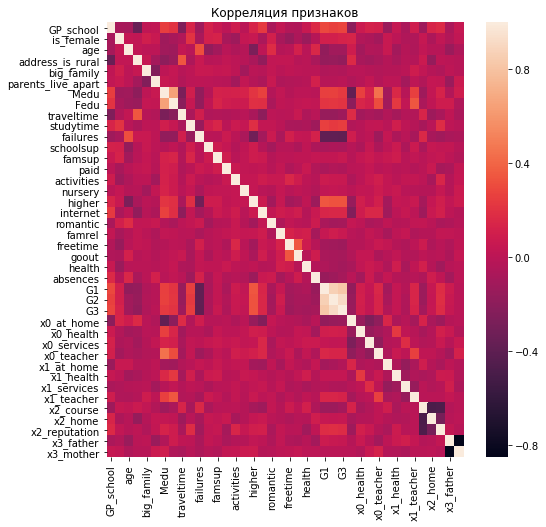

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr()) 
t = plt.title("Корреляция признаков")

Итак, из признаков с оценками (`G1, G2, G3`) оставим только `G3`, а `Fedu` и `Medu` усредним.

In [34]:
data['parents_education'] = (data['Fedu'] + data['Medu'])/2
data.drop(['Fedu', 'Medu', 'G1', 'G2'], axis=1, inplace=True)
data = pd.DataFrame(scale(data), columns=data.columns)
data.head(3)

,GP_school,is_female,age,address_is_rural,big_family,parents_live_apart,traveltime,studytime,failures,schoolsup,...,x1_at_home,x1_health,x1_services,x1_teacher,x2_course,x2_home,x2_reputation,x3_father,x3_mother,parents_education
0,0.730944,0.833377,1.031695,-0.660182,0.648175,2.666927,0.576718,0.083653,-0.374305,2.923032,...,-0.263045,-0.19168,-0.621894,4.126473,1.130130,-0.545894,-0.53161,-0.555399,0.652973,1.568580
1,0.730944,0.833377,0.210137,-0.660182,0.648175,-0.374963,-0.760032,0.083653,-0.374305,-0.342110,...,-0.263045,-0.19168,-0.621894,-0.242338,1.130130,-0.545894,-0.53161,1.800508,-1.531457,-1.392181
2,0.730944,0.833377,-1.432980,-0.660182,-1.542792,-0.374963,-0.760032,0.083653,-0.374305,2.923032,...,-0.263045,-0.19168,-0.621894,-0.242338,-0.884854,-0.545894,-0.53161,-0.555399,0.652973,-1.392181


In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, y_Dalc, 
                                                    test_size=0.3,
                                                    random_state=22)

Будем рассматривать задачу регрессии (хотя фактически нас просят предсказать 5 классов, но на них есть порядок). В ответе округлим предсказания до ближайшего целого от 1 до 5.

In [9]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
print('Train')
print('no round:', mean_squared_error(y_pred, y_train))
print('rounded:', mean_squared_error(y_pred.round(), y_train))
print('accuracy:', accuracy_score(np.minimum(np.round(y_pred), 5), y_train))

print('Test')
y_test_pred = lr.predict(X_test)
print('no round:', mean_squared_error(y_test_pred, y_test))
print('rounded:', mean_squared_error(y_test_pred.round(), y_test))
print('accuracy:', accuracy_score(np.minimum(np.round(y_test_pred), 5), y_test))

Train
no round: 0.5958400507521732
rounded: 0.7092511013215859
accuracy: 0.579295154185022
Test
no round: 0.8545655788660281
rounded: 1.005128205128205
accuracy: 0.5128205128205128


Выше мы использовали все доступные признаки. Теперь попробуем установить оптимальное число признаков, пользуясь критерием Стьюдента для гипотезы о незначимости каждого из признаков. Отсортируем признаки в порядке возрастания pvalue и будем последовательно добавлять следующие по значимости.

In [18]:
from statsmodels.regression.linear_model import OLS
results = OLS(y_train, X_train, hasconst=True).fit(use_t=True)
feature_importance = results.pvalues.to_dict()
sorted_features = sorted(feature_importance, key=feature_importance.get)
features = len(sorted_features)

In [11]:
mse_results = []
accuracy_results = []
mse_results_round = []
for k in range(1, features + 1):
    lr = LinearRegression(fit_intercept=True)
    reduced_features = sorted_features[:k]
    X_train_reduced = X_train[reduced_features]
    X_test_reduced = X_test[reduced_features]
    lr.fit(X_train_reduced, y_train)
    
    y_pred = lr.predict(X_train_reduced)
    y_test_pred = lr.predict(X_test_reduced)
    y_pred_rounded = np.minimum(np.round(y_pred), 5)
    y_test_pred_rounded = np.minimum(np.round(y_test_pred), 5)
    mse_results.append((mean_squared_error(y_pred, y_train),
                       mean_squared_error(y_test_pred, y_test)))
    mse_results_round.append((mean_squared_error(y_pred_rounded, y_train),
                       mean_squared_error(y_test_pred_rounded, y_test)))
    accuracy_results.append((accuracy_score(y_pred_rounded, y_train),
                       accuracy_score(y_test_pred_rounded, y_test)))

In [12]:
mse_results_train = np.array(mse_results_round).T[0]
mse_results_test = np.array(mse_results_round).T[1]
acc_results_train = np.array(accuracy_results).T[0]
acc_results_test = np.array(accuracy_results).T[1]

Посчитаем дисперсию ошибки при взятии разных подвыборок в качестве тестовой.

In [13]:
indices = np.arange(data.shape[0])
indices_shuffled = []
test_size = int(np.round(0.3 * data.shape[0]))
partitions_size = 100
mse_data = np.zeros((partitions_size, features))
accuracy_data = np.zeros((partitions_size, features))
mse_test_data = np.zeros((partitions_size, features))
accuracy_test_data = np.zeros((partitions_size, features))
for i in range(partitions_size):
    indices_shuffled = np.random.permutation(indices)
    X_train = data.iloc[indices_shuffled[test_size:]] 
    X_test = data.iloc[indices_shuffled[:test_size]] 
    y_train = y_Dalc[indices_shuffled[test_size:]]
    y_test = y_Dalc[indices_shuffled[:test_size]]
    for k in range(1, features + 1): 
        lr = LinearRegression(fit_intercept=True)
        reduced_features = sorted_features[:k]
        X_train_reduced = X_train[reduced_features]
        X_test_reduced = X_test[reduced_features]
        lr.fit(X_train_reduced, y_train)
        y_pred = lr.predict(X_train_reduced)
        y_test_pred = lr.predict(X_test_reduced)
        y_pred_rounded = np.minimum(np.round(y_pred), 5)
        y_test_pred_rounded = np.minimum(np.round(y_test_pred), 5)
        mse_data[i][k-1] = mean_squared_error(y_pred_rounded, y_train)
        accuracy_data[i][k-1] = accuracy_score(y_pred_rounded, y_train)
        mse_test_data[i][k-1] = mean_squared_error(y_test_pred_rounded, y_test)
        accuracy_test_data[i][k-1] = accuracy_score(y_test_pred_rounded, y_test)

Посмотрим на среднюю дисперсию при разном количестве признаков (более наглядно покажем на графике)

In [14]:
mse_std = np.std(mse_data, axis=0)
mse_test_std = np.std(mse_test_data, axis=0)
acc_std = np.std(accuracy_data, axis=0)
acc_test_std = np.std(accuracy_test_data, axis=0)
print('MSE')
print('train:', mse_std.mean())
print('test:', mse_test_std.mean())
print('Accuracy')
print('train:', acc_std.mean())
print('test:', acc_test_std.mean())

MSE
train: 0.043711321156705604
test: 0.0911881493949942
Accuracy
train: 0.021003891011671237
test: 0.035083109815568746


Построим график зависимости ошибки от количества признаков, указав на нём и дисперсию тоже.

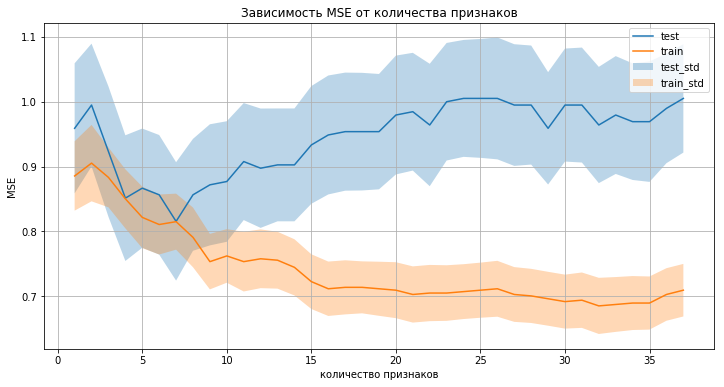

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, features + 1), mse_results_test, label='test')
plt.fill_between(np.arange(1, features + 1),
                 mse_results_test - mse_test_std,
                 mse_results_test + mse_test_std,
                 alpha = 0.3, label='test_std')

plt.plot(np.arange(1, features + 1), mse_results_train, label='train')
plt.fill_between(np.arange(1, features + 1),
                 mse_results_train - mse_std,
                 mse_results_train + mse_std,
                 alpha = 0.3, label='train_std')
plt.legend()
plt.grid()
plt.ylabel('MSE')
plt.xlabel('количество признаков')
t = plt.title('Зависимость MSE от количества признаков')
plt.savefig('graph.jpg')

Таким образом, мы видим, что уже после 8 признаков ошибка на контрольной выборке начинает расти.

Accuracy менее важная для нас метрика, но убедимся, что на ней 8 признаков тоже являются одним из оптимальных выборов:

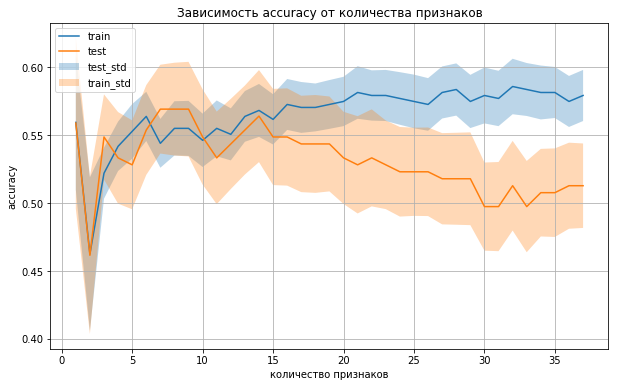

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, features + 1), np.array(accuracy_results).T[0],
        label='train')
plt.plot(np.arange(1, features + 1), np.array(accuracy_results).T[1],
        label='test')
plt.fill_between(np.arange(1, features + 1),
                 acc_results_train - acc_std,
                 acc_results_train + acc_std,
                 alpha = 0.3, label='test_std')
plt.fill_between(np.arange(1, features + 1),
                 acc_results_test - acc_test_std,
                 acc_results_test + acc_test_std,
                 alpha = 0.3, label='train_std')
plt.legend()
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('количество признаков')
t = plt.title('Зависимость accuracy от количества признаков')